## Import Statements

In [142]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score

## Reading the data set

In [14]:
customer_churn = pd.read_csv("customer_churn.csv")

In [15]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [17]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Manipulation

##### a. Extract the 5th column & store it in ‘customer_5’

In [18]:
customer_5 = customer_churn.iloc[:, 4]
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

##### b. Extract the 15th column & store it in ‘customer_15’

In [19]:
customer_15 = customer_churn.iloc[:, 14]
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

##### c. Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’

In [24]:
senior_male_electronic = customer_churn[(customer_churn["gender"]=="Male") & (customer_churn["SeniorCitizen"]==1) & (customer_churn["PaymentMethod"]=="Electronic check")]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


##### d. Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure

In [26]:
customer_total_tenure = customer_churn[(customer_churn["tenure"]>70) | (customer_churn["MonthlyCharges"]>100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


##### e. Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’

In [30]:
two_mail_yes = customer_churn[(customer_churn["Contract"]=="Two year") & (customer_churn["PaymentMethod"]=="Mailed check") & (customer_churn["Churn"]=="Yes")]
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


##### f. Extract 333 random records from the customer_churndataframe& store the result in ‘customer_333’

In [31]:
customer_333 = customer_churn.sample(n=333)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2354,9424-CMPOG,Male,0,Yes,Yes,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.60,197.4,No
4188,2357-COQEK,Female,1,No,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,103.30,2890.65,Yes
3307,0253-ZTEOB,Female,0,Yes,Yes,48,Yes,Yes,DSL,No,...,No,Yes,Yes,Yes,Two year,No,Electronic check,79.65,3870.3,No
2813,6484-LATFU,Male,0,No,No,68,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.55,1657.4,No
595,0719-SYFRB,Female,0,No,No,12,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,61.65,713.75,Yes


##### g. Get the count of different levels from the ‘Churn’ column

In [32]:
counts_churn = customer_churn["Churn"].value_counts()
counts_churn

No     5174
Yes    1869
Name: Churn, dtype: int64

## Data Visualization

##### a. Build a bar-plot for the ’InternetService’ column:<br>i. Set x-axis label to ‘Categories of Internet Service’<br>ii. Set y-axis label to ‘Count of Categories’<br>iii. Set the title of plot to be ‘Distribution of Internet Service’<br>iv. Set the color of the bars to be ‘orange’

Text(0.5, 1.0, 'Distribution of Internet Service')

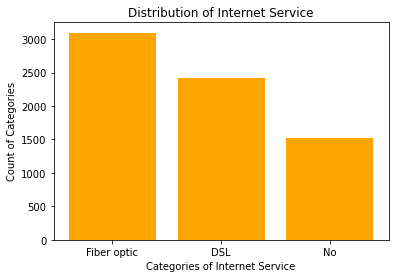

In [36]:
x = customer_churn["InternetService"].value_counts().keys().tolist()
y = customer_churn["InternetService"].value_counts().tolist()
plt.bar(x, y, color="orange")
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")

##### Build a histogram for the ‘tenure’ column:<br>i. Set the number of bins to be 30<br>ii. Set the color of the bins to be ‘green’<br>iii. Assign the title ‘Distribution of tenure’

Text(0.5, 1.0, 'Distribution of tenure')

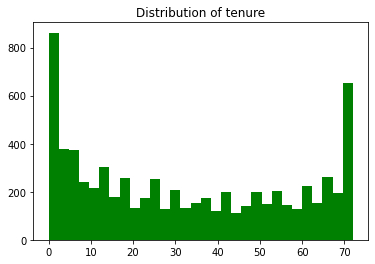

In [40]:
plt.hist(customer_churn["tenure"], bins=30, color="green")
plt.title("Distribution of tenure")

##### c. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:<br>i. Assign the points a color of ‘brown’<br>ii. Set the x-axis label to ‘Tenure of customer’<br>iii. Set the y-axis label to ‘Monthly Charges of customer’<br>iv. Set the title to ‘Tenure vs Monthly Charges

Text(0.5, 1.0, 'Tenure vs monthly Charges')

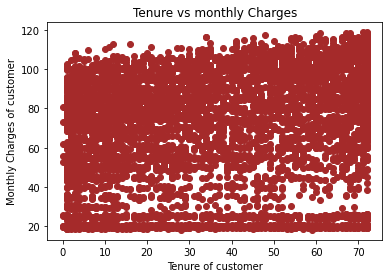

In [42]:
plt.scatter(x=customer_churn["tenure"], y=customer_churn["MonthlyCharges"], color="brown")
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs monthly Charges")

##### d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.

<AxesSubplot:title={'center':'tenure'}, xlabel='Contract'>

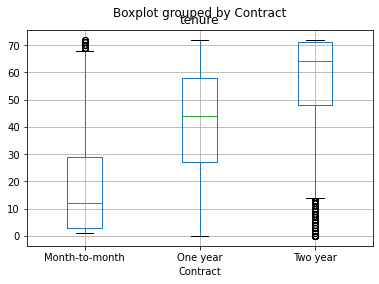

In [48]:
customer_churn.boxplot(by="Contract", column="tenure")

# Machine Learning

## Linear Regression

##### Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’<br>i. Divide the dataset into train and test sets in 70:30 ratio.<br>ii. Build the model on train set and predict the values on test set<br>iii. After predicting the values, find the root mean square error<br>iv. Find out the error in prediction & store the result in ‘error’<br>v. Find the root mean square error

In [54]:
# Define independent variable(y) and dependent variable(x)
y = customer_churn[["MonthlyCharges"]]
x = customer_churn[["tenure"]]

In [56]:
# Split the data into train and test data sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# check shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4930, 1), (4930, 1), (2113, 1), (2113, 1))

In [57]:
# create instance for the Linear Regression model
regressor = LinearRegression()

# Fit the model on the training data set
regressor.fit(x_train, y_train)

LinearRegression()

In [58]:
# predict y values using the test data set
y_pred = regressor.predict(x_test)

In [65]:
# calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error for Simple Linear Regression Model: {'%.2f' % rmse}")

Root Mean Squared Error for Simple Linear Regression Model: 29.39


## Logistic Regression

##### a. Build a simple logistic regression model where dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’<br>i. Divide the dataset in 65:35 ratio<br>ii. Build the model on train set and predict the values on test set<br>iii. Build the confusion matrix and get the accuracy score

In [136]:
# Define independent variable(y) and dependent variable(x)
x = customer_churn[["MonthlyCharges"]]
y = customer_churn[["Churn"]]

# Split the data into train and test data sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=0)

In [137]:
# create instance for the Logistic Regression model
log_model = LogisticRegression()

# Fit the model on the training data set
log_model.fit(x_train, y_train)

C:\Users\aimee\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [138]:
# predict y values using the test data set
y_pred = log_model.predict(x_test)

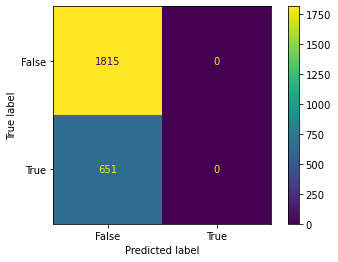

In [139]:
# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True]) 
cm_display.plot()
plt.show() 

In [140]:
# Accuracy Score
acc_score = accuracy_score(y_test, y_pred)
print(f"The accuracy score for log model 1 is {acc_score}")

The accuracy score for log model 1 is 0.7360097323600974


##### b. Build a multiple logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’<br>i. Divide the dataset in 80:20 ratio<br>ii. Build the model on train set and predict the values on test set<br>iii. Build the confusion matrix and get the accuracy score

In [121]:
# Define independent variable(y) and dependent variables(x)
x = customer_churn[["MonthlyCharges", "tenure"]]
y = customer_churn[["Churn"]]

# Split the data into train and test data sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [122]:
# create instance for the Logistic Regression model
log_model2 = LogisticRegression()

# Fit the model on the training data set
log_model2.fit(x_train, y_train)

C:\Users\aimee\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [123]:
# predict y values using the test data set
y_pred = log_model2.predict(x_test)

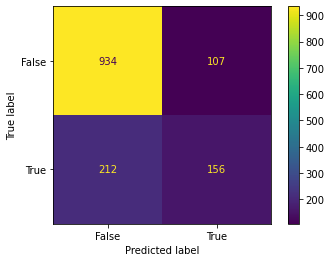

In [126]:
# Confusion Matrix

confusion_matrix_2 = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_2, display_labels = [False, True]) 
cm_display.plot()
plt.show() 

In [127]:
# Accuracy Score
acc_score = accuracy_score(y_test, y_pred)
print(f"The accuracy score for log model 2 is {acc_score}")

The accuracy score for log model 2 is 0.7735982966643009


## Decision Tree

##### Build a decision tree model where dependent variable is ‘Churn’ & independent variable is ‘tenure’<br>i. Divide the dataset in 80:20 ratio<br>ii. Build the model on train set and predict the values on test set<br>iii. Build the confusion matrix and calculate the accuracy

In [128]:
# Define independent variable(y) and dependent variables(x)
x = customer_churn[["tenure"]]
y = customer_churn[["Churn"]]

# Split the data into train and test data sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [131]:
# create instance for the Decision Tree model
tree = DecisionTreeClassifier()

# Fit the model on the training data set
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [132]:
# predict y values using the test data set
y_pred = tree.predict(x_test)

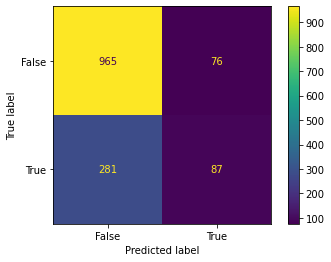

In [133]:
# Confusion Matrix

confusion_matrix_tree = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_tree, display_labels = [False, True]) 
cm_display.plot()
plt.show() 

In [134]:
# Accuracy Score
acc_score = accuracy_score(y_test, y_pred)
print(f"The accuracy score for the Decision Tree Model is {acc_score}")

The accuracy score for the Decision Tree Model is 0.7466288147622427


## Random Forest

##### Build a Random Forest model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ and ‘MonthlyCharges’<br>i. Divide the dataset in 70:30 ratio<br>ii. Build the model on train set and predict the values on test set<br>iii. Build the confusion matrix and calculate the accuracy

In [147]:
# Define independent variable(y) and dependent variables(x)
x = customer_churn[["MonthlyCharges", "tenure"]]
y = customer_churn[["Churn"]]

# Split the data into train and test data sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [148]:
# create instance for the Decision Tree model
random_forest = RandomForestClassifier()

# Fit the model on the training data set
random_forest.fit(x_train, y_train)

C:\Users\aimee\AppData\Local\Temp/ipykernel_11164/3136500405.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train)


RandomForestClassifier()

In [149]:
# predict y values using the test data set
y_pred = random_forest.predict(x_test)

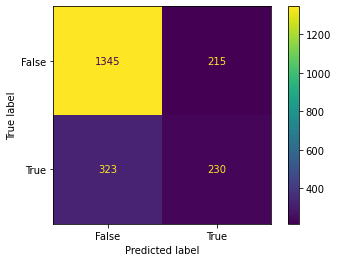

In [150]:
# Confusion Matrix

confusion_matrix_rf = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf, display_labels = [False, True]) 
cm_display.plot()
plt.show() 

In [146]:
# Accuracy Score
acc_score = accuracy_score(y_test, y_pred)
print(f"The accuracy score for the Random Forest Model is {acc_score}")

The accuracy score for the Random Forest Model is 0.7453857075248462
